In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random
import networkx as nx
from networkx.algorithms.approximation import min_weighted_vertex_cover

def hill_climbing(graph_name, q, random_seed, max_time):
    
    random.seed(random_seed)

    if graph_name == 'power':
        opt = 2203
    if graph_name == 'star2':
        opt = 4542
    
    G = nx.Graph()
    lines = open('./'+graph_name+'.graph', 'r').readlines()
    nV, nE, _ = lines[0].split()
    for i in range(1, int(nV)+1):
        vs = lines[i].split()
        for v in vs:
            G.add_edge(i, int(v))

    start_time = time.time()

    # Find an initial vertex cover

    C = []
    update_times = []
    update_results = []

    H = G.copy()

    while H.size():
        max_grade = max(H.degree, key=lambda x: x[1])[1]
        max_grade_nodes_list = [node[0] for node in H.degree if node[1] == max_grade]

        n = max_grade_nodes_list[0]

        H.remove_node(n)
        C.append(n)

    C_new = C

    lst = list(G.edges)
    
    k_opt = 0
    found_time = -1

    while ((time.time() - start_time) < max_time):

        c = 0
        for u,v in G.edges:
            if u not in C and v not in C:
                c = -1
                
        if c == 0:

            # C is a vertex cover, trace the improvements

            
            
            l = len(C)
            if (l-opt)/opt < q:
                k_opt = 1
            
            C_new = C.copy()
            C.pop(random.randrange(len(C)))

        if k_opt == 1:
            found_time = time.time() - start_time
            break

        if len(C) == 0:
            break
        # select exiting vertex

        values = [0 for _ in range(len(C))]
        dic = dict(zip(C, values))
        for u,v in G.edges:
            if u in C and v not in C:
                dic[u] += 1
            if u not in C and v in C:
                dic[v] += 1
        a = min(dic, key=dic.get)

        C.remove(a)

        # select entering vertex
        random.shuffle(lst)
        for u,v in lst:
            if u not in C and v not in C:
                C.append(v)
                break
                
    return found_time


[32.108861207962036, 36.560755252838135, 41.745330810546875, 43.11710453033447, 45.954336166381836, 47.69455671310425, 48.59279012680054, 49.192704916000366, 50.68535804748535, 51.40076184272766, 52.72681450843811, 53.92046308517456, 54.322404623031616, 56.617648124694824, 57.34855604171753, 57.91133713722229, 61.61291313171387, 63.26718878746033, 63.78421139717102, 71.96050953865051, 72.18238925933838, 75.33634757995605, 75.96068096160889, 79.26131129264832, 81.34184980392456, 81.57845449447632, 83.44261717796326, 84.62595009803772, 88.79619812965393, 89.0593273639679]
[19.442597150802612, 20.859439373016357, 23.576881408691406, 24.423779726028442, 26.375187158584595, 26.537447929382324, 26.797210931777954, 27.98536252975464, 28.376916885375977, 28.675190925598145, 28.934651851654053, 29.9430410861969, 30.04146909713745, 30.348411321640015, 32.196077823638916, 33.22386837005615, 33.38960838317871, 33.705065965652466, 35.09678387641907, 35.491286516189575, 35.60195064544678, 36.1606776

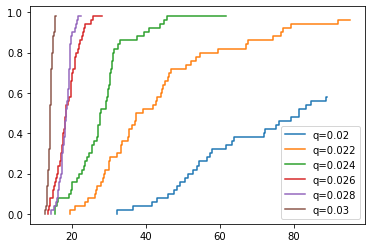

In [2]:
q_lst = [0.02, 0.022, 0.024, 0.026, 0.028, 0.03]
max_time = 100
num_iter = 50
graph_name = 'power'

for q in q_lst:
    time_lst = []
    for i in range(num_iter):
        random_seed = i
        found_time = hill_climbing(graph_name, q, random_seed, max_time)
        time_lst.append(found_time)
    
    tmp = set(time_lst)
    if -1 in tmp:
        tmp.remove(-1)
    time_lst= list(tmp)
    time_lst.sort()
    
    l = len(time_lst)
    prob_lst = [(i-1)/num_iter for i in range(1,l+1)]
    plt.step(time_lst, prob_lst, label='q='+str(q))
    print(time_lst)
plt.legend(loc='best')
plt.show()